## REGRESSION: ONE NUMERIC, ONE CATEGORICAL TO PREDICT NUMERIC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from itertools import product
import numpy as np

A partir del dataSet de Taiwan:


*   Visualiza correctamente ( escojiendo el gráfico indicado), el precio en función de la dist al metro y en función de la antiguedad de la vivienda.
*   Calcula el modelo para cada una de las variables, y en función de las dos variables conjuntas.
*  Muestra gráficamente la regresión lineal del modelo conjunto con sus predicciones.
* Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano.
* Compara el error de los modelos e interperta el resultado.



In [2]:
df_taiwan = pd.read_csv('taiwan_real_estate2.csv')
df_taiwan.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


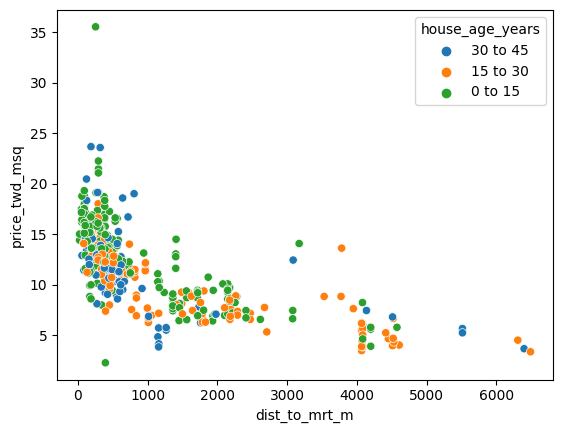

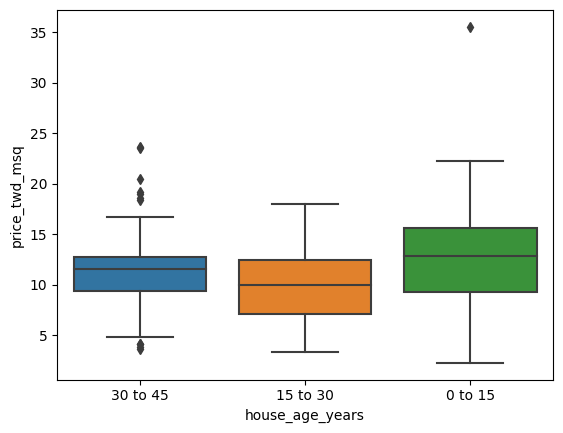

In [3]:
#Visualiza correctamente ( escojiendo el gráfico indicado), el precio en función de la dist al metro y en función de la antiguedad de la vivienda
sns.scatterplot(y='price_twd_msq',x='dist_to_mrt_m',hue='house_age_years',data=df_taiwan)
plt.show()

sns.boxplot(y='price_twd_msq',x='house_age_years',data=df_taiwan)
plt.show()

In [4]:
#Calcula el modelo para cada una de las variables, y en función de las dos variables conjuntas.
mdl_preu_metros = ols('price_twd_msq~dist_to_mrt_m', data=df_taiwan).fit()
mdl_preu_edad = ols('price_twd_msq~house_age_years+0', data=df_taiwan).fit()
mdl_both = ols('price_twd_msq~dist_to_mrt_m+house_age_years+0', data=df_taiwan).fit()
mdl_both.params

house_age_years[0 to 15]     14.600491
house_age_years[15 to 30]    13.134525
house_age_years[30 to 45]    13.103797
dist_to_mrt_m                -0.002130
dtype: float64

In [5]:
coeff = mdl_both.params

edad_015, edad_1530, edad_3045, pend = coeff

In [6]:
#Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano.
distancia = [2500]
edad = df_taiwan['house_age_years'].unique()

comb = product(distancia,edad)

df = pd.DataFrame(comb,columns=['dist_to_mrt_m','house_age_years'])

df_predicted = df.assign(price_predict=mdl_both.predict(df))

print(df_predicted)

   dist_to_mrt_m house_age_years  price_predict
0           2500        30 to 45       7.779153
1           2500        15 to 30       7.809881
2           2500         0 to 15       9.275846


In [7]:
distancia = np.arange(1000,7000,500)

comb = product(distancia,edad)

df = pd.DataFrame(comb,columns=['dist_to_mrt_m','house_age_years'])

df_predicted = df.assign(price_predict=mdl_both.predict(df))

print(df_predicted)

    dist_to_mrt_m house_age_years  price_predict
0            1000        30 to 45      10.973939
1            1000        15 to 30      11.004667
2            1000         0 to 15      12.470633
3            1500        30 to 45       9.909011
4            1500        15 to 30       9.939738
5            1500         0 to 15      11.405704
6            2000        30 to 45       8.844082
7            2000        15 to 30       8.874809
8            2000         0 to 15      10.340775
9            2500        30 to 45       7.779153
10           2500        15 to 30       7.809881
11           2500         0 to 15       9.275846
12           3000        30 to 45       6.714224
13           3000        15 to 30       6.744952
14           3000         0 to 15       8.210918
15           3500        30 to 45       5.649295
16           3500        15 to 30       5.680023
17           3500         0 to 15       7.145989
18           4000        30 to 45       4.584367
19           4000   

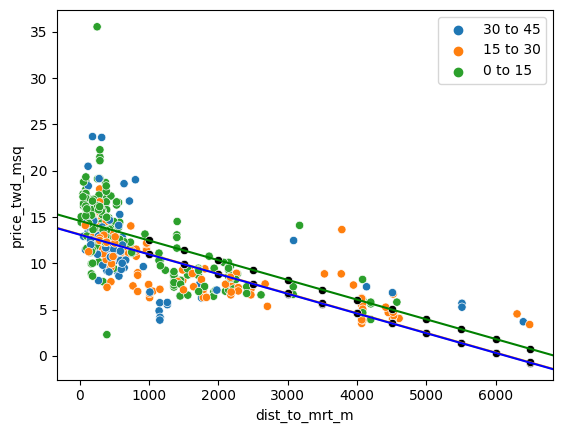

In [8]:
#Muestra gráficamente la regresión lineal del modelo conjunto con sus predicciones.
fig = plt.figure()
plt.axline(xy1=(0,edad_015),slope=pend, color='green')
plt.axline(xy1=(0,edad_1530),slope=pend, color='orange')
plt.axline(xy1=(0,edad_3045),slope=pend, color='blue')
sns.scatterplot(y='price_twd_msq',x='dist_to_mrt_m',hue='house_age_years',data=df_taiwan)
sns.scatterplot(y='price_predict',x='dist_to_mrt_m',color='black',data=df_predicted)
plt.show()

In [9]:
#Compara el error de los modelos e interperta el resultado.
print(np.sqrt(mdl_both.mse_resid))
print(np.sqrt(mdl_preu_metros.mse_resid))
print(np.sqrt(mdl_preu_edad.mse_resid))
print('sin duda el que tiene menos fallo es el modelo ocnjunto de precio, distancia y edad')

2.9639285761436454
3.046456710939631
3.950183875630859
sin duda el que tiene menos fallo es el modelo ocnjunto de precio, distancia y edad




*   Crea un modelo para cada una de las categorias
*   Muestra en un gráfico las predicciones (en negro), respecto el gráfico original con sus linea de regresión.
* Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano. Compara con el apartado anterior
* Compara el error de los modelos e interperta el resultado.





In [10]:
#Crea un modelo para cada una de las categorias

mdl_015 = ols('price_twd_msq~dist_to_mrt_m', data=df_taiwan[df_taiwan['house_age_years']=='0 to 15']).fit()
mdl_1530 = ols('price_twd_msq~dist_to_mrt_m', data=df_taiwan[df_taiwan['house_age_years']=='15 to 30']).fit()
mdl_3045 = ols('price_twd_msq~dist_to_mrt_m', data=df_taiwan[df_taiwan['house_age_years']=='30 to 45']).fit()

In [11]:
#Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano. Compara con el apartado anterior
distancia = np.arange(1000,7000,500)
df_015 = pd.DataFrame( product(distancia,['0 to 15']),columns=['dist_to_mrt_m','house_age_years'])
df_1530 = pd.DataFrame( product(distancia,['15 to 30']),columns=['dist_to_mrt_m','house_age_years'])
df_3045 = pd.DataFrame( product(distancia,['30 to 45']),columns=['dist_to_mrt_m','house_age_years'])

df_predicted_015 = df_015.assign(price_predict=mdl_015.predict(df_015))
df_predicted_1530 = df_1530.assign(price_predict=mdl_1530.predict(df_1530))
df_predicted_3045 = df_3045.assign(price_predict=mdl_3045.predict(df_3045))
df_predicted_all = df_predicted_015.append(df_predicted_1530).append(df_predicted_3045)

print(df_predicted_all)

    dist_to_mrt_m house_age_years  price_predict
0            1000         0 to 15      12.412973
1            1500         0 to 15      10.979998
2            2000         0 to 15       9.547023
3            2500         0 to 15       8.114048
4            3000         0 to 15       6.681073
5            3500         0 to 15       5.248098
6            4000         0 to 15       3.815123
7            4500         0 to 15       2.382148
8            5000         0 to 15       0.949173
9            5500         0 to 15      -0.483802
10           6000         0 to 15      -1.916776
11           6500         0 to 15      -3.349751
0            1000        15 to 30      10.826929
1            1500        15 to 30       9.929812
2            2000        15 to 30       9.032694
3            2500        15 to 30       8.135577
4            3000        15 to 30       7.238459
5            3500        15 to 30       6.341342
6            4000        15 to 30       5.444225
7            4500   

D:\Temp\ipykernel_13984\1173283701.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predicted_all = df_predicted_015.append(df_predicted_1530).append(df_predicted_3045)


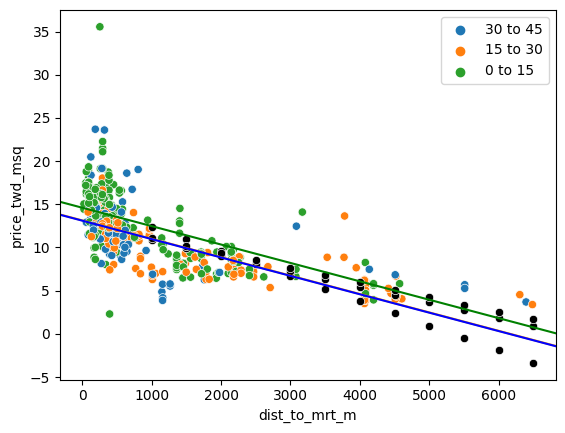

In [12]:
#Muestra en un gráfico las predicciones (en negro), respecto el gráfico original con sus linea de regresión.

fig = plt.figure()
plt.axline(xy1=(0,edad_015),slope=pend, color='green')
plt.axline(xy1=(0,edad_1530),slope=pend, color='orange')
plt.axline(xy1=(0,edad_3045),slope=pend, color='blue')
sns.scatterplot(y='price_twd_msq',x='dist_to_mrt_m',hue='house_age_years',data=df_taiwan)
sns.scatterplot(y='price_predict',x='dist_to_mrt_m',color='black',data=df_predicted_all)
plt.show()

In [13]:
#Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano. Compara con el apartado anterior
print(df_predicted_all[df_predicted_all['dist_to_mrt_m']==2500])

   dist_to_mrt_m house_age_years  price_predict
3           2500         0 to 15       8.114048
3           2500        15 to 30       8.135577
3           2500        30 to 45       8.503610


In [14]:
#Compara el error de los modelos e interperta el resultado.
print(np.sqrt(mdl_015.mse_resid))
print(np.sqrt(mdl_1530.mse_resid))
print(np.sqrt(mdl_3045.mse_resid))
print('en este caso y comparandolo con el modelo que mejor ha salido en global, alguno de estos modelos tiene mejor resultado por separado que junto.')

3.084345693177788
2.1650724527854317
3.3623709907906782
en este caso y comparandolo con el modelo que mejor ha salido en global, alguno de estos modelos tiene mejor resultado por separado que junto.


## REGRESSION: TWO NUMERIC TO PREDICT NUMERIC

* Crea un gráfico 3D que relacione el precio de las viviendas versus la distáncia al metro y el número de supermercados. Responder V/F:

- El precio de la vivienda disminuye cuando disminuye el número de tienda.

- Hay una casa con un precio excepcionalmente alto por la cantidad de tiendas de conveniencia cercanas.

- Cuanto más lejos esté la estación de MRT más cercana, menor será el precio de la vivienda.

- Tiende a haber una relación positiva entre el número de tiendas de conveniencia y la distancia a la estación MRT más cercana.


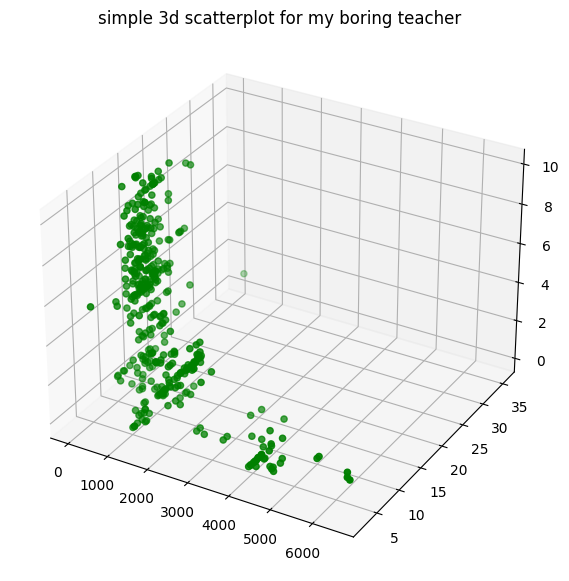

In [15]:
# Crea un gráfico 3D que relacione el precio de las viviendas versus la distáncia al metro y el número de supermercados. Responder V/F:
z = 'n_convenience'
x = 'dist_to_mrt_m'
y = 'price_twd_msq'
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green",data = df_taiwan)
plt.title("simple 3d scatterplot for my boring teacher")
 
# show plot
plt.show()

In [16]:
#El precio de la vivienda disminuye cuando disminuye el número de tienda.
print('False')
#Hay una casa con un precio excepcionalmente alto por la cantidad de tiendas de conveniencia cercanas.
print('True')
#Cuanto más lejos esté la estación de MRT más cercana, menor será el precio de la vivienda.
print('True')
#Tiende a haber una relación positiva entre el número de tiendas de conveniencia y la distancia a la estación MRT más cercana.
print('True')

False
True
True
True


La idea del anterior punto es que te dieras cuenta que el gráfico 3D dificulta su comprensión. Piensa y dibuja la relación con otro gráfico (2d) que permita sacar mejores conclusiones. (Consejo, como siguen escalas distintas mejor hacer raíz cuadrada de la distáncia)

In [17]:
#La idea del anterior punto es que te dieras cuenta que el gráfico 3D dificulta su comprensión. Piensa y dibuja la relación con otro gráfico (2d) que permita sacar mejores conclusiones. (Consejo, como siguen escalas distintas mejor hacer raíz cuadrada de la distáncia)
df_taiwan['distanciaCuadrada'] = np.sqrt(df_taiwan['dist_to_mrt_m']) 

mdl_both_SUPER = ols('price_twd_msq~distanciaCuadrada+n_convenience+0', data=df_taiwan).fit()
mdl_both_EDAD = ols('price_twd_msq~distanciaCuadrada+house_age_years+0', data=df_taiwan).fit()
mdl_both_SUPER.params

distanciaCuadrada    0.123334
n_convenience        1.711741
dtype: float64

In [18]:
distancia = np.sqrt(np.arange(0,7000,500))
supers = np.arange(1,3,1)
comb = product(distancia,supers)

df = pd.DataFrame(comb,columns=['distanciaCuadrada','n_convenience'])

df_predicted = df.assign(price_predict=mdl_both_SUPER.predict(df))

print(df_predicted)

    distanciaCuadrada  n_convenience  price_predict
0            0.000000              1       1.711741
1            0.000000              2       3.423482
2           22.360680              1       4.469580
3           22.360680              2       6.181321
4           31.622777              1       5.611914
5           31.622777              2       7.323655
6           38.729833              1       6.488458
7           38.729833              2       8.200199
8           44.721360              1       7.227419
9           44.721360              2       8.939160
10          50.000000              1       7.878456
11          50.000000              2       9.590197
12          54.772256              1       8.467039
13          54.772256              2      10.178780
14          59.160798              1       9.008297
15          59.160798              2      10.720038
16          63.245553              1       9.512087
17          63.245553              2      11.223828
18          

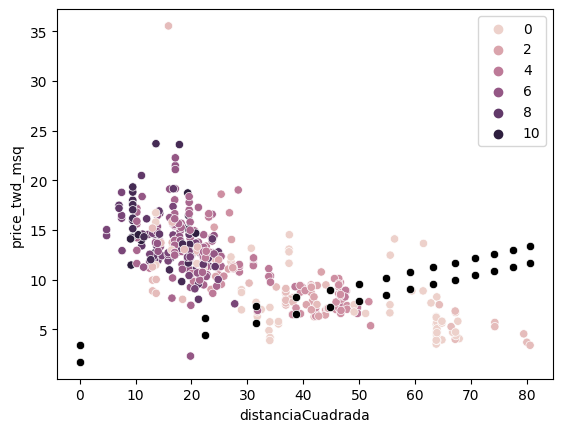

In [19]:
fig = plt.figure()
sns.scatterplot(y='price_twd_msq',x='distanciaCuadrada',hue='n_convenience',data=df_taiwan)
sns.scatterplot(y='price_predict',x='distanciaCuadrada',color='black',data=df_predicted)
plt.show()

In [20]:
print(np.sqrt(mdl_both_SUPER.mse_resid))

4.726863224216674




Me voy a comprar una casas, dudo entre casas de dos barrio. En el barrio 1 hay 4 supermercados, el barrio dos 3 supermercados. Quiero predecir el precio de las casas para las distancias al metro más cercano de (400, 800 y 1200km).

* Predice su precio de manera conjunta (No una a una). Tip: Usa para predecir el modelo el sqrt de la distancia.
* Muéstra en un gráfico solapado los valores originales y los predecidos usando un color y un marcador distinto.



In [21]:
distancia = np.sqrt(np.arange(0,1200,400))
Barrio1_supers = [4]
Barrio2_supers = [3]
comb = product(distancia,Barrio1_supers)
comb2 = product(distancia,Barrio2_supers)

df = pd.DataFrame(comb,columns=['distanciaCuadrada','n_convenience'])
df2= pd.DataFrame(comb2,columns=['distanciaCuadrada','n_convenience'])

df_predicted = df.assign(price_predict=mdl_both_SUPER.predict(df))
df_predicted2 = df2.assign(price_predict=mdl_both_SUPER.predict(df2))
df_predicted_all = df_predicted.append(df_predicted2)
print(df_predicted_all)

   distanciaCuadrada  n_convenience  price_predict
0           0.000000              4       6.846964
1          20.000000              4       9.313650
2          28.284271              4      10.335385
0           0.000000              3       5.135223
1          20.000000              3       7.601909
2          28.284271              3       8.623644


D:\Temp\ipykernel_13984\1187456042.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predicted_all = df_predicted.append(df_predicted2)


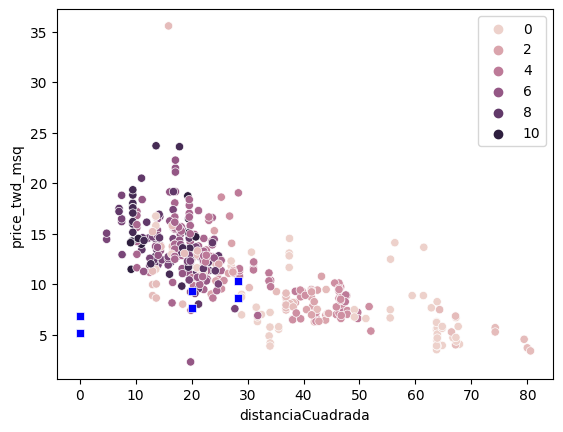

In [22]:
fig = plt.figure()
sns.scatterplot(y='price_twd_msq',x='distanciaCuadrada',hue='n_convenience',data=df_taiwan)
sns.scatterplot(y='price_predict',x='distanciaCuadrada',marker='s',color='blue',data=df_predicted_all)
plt.show()

## MULTIPLE REGRESSION



*   Muestra gráficamente el gráfico que relaciona el precio con la distancia y el nuúmero de supermercados para todas la categorias de antiguedad de viviendas. Tip: sns FacetGrid




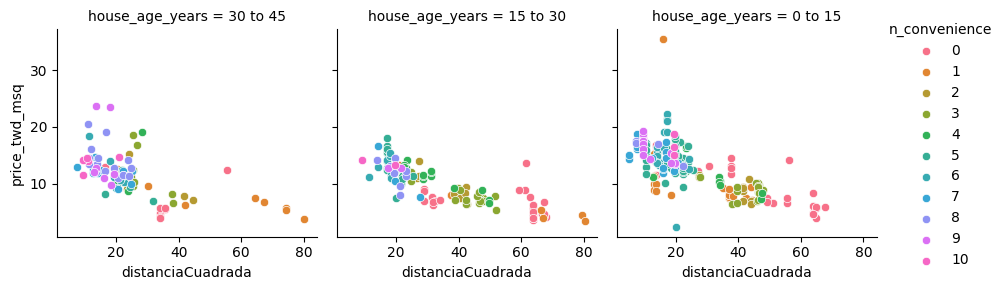

In [25]:
g = sns.FacetGrid(df_taiwan, col="house_age_years", hue="n_convenience")
g.map_dataframe(sns.scatterplot, x="distanciaCuadrada", y="price_twd_msq")
g.add_legend()

Respecto a mi duda anterior sobre donde comprarme una casa, las del barrio 1 son todas muy viejas (entre 30 y 45). En cambio las del barrio 2 son nuevas.
Al final me he quedado entre tres opciones:

*   Casa Barrio 1 distancia media al metro (400m)
*   Casa Barrio 2 nueva (4 años) lejana al metro (1000m)
*   Casa Barrio 2 de 23 años de antiguedad y cercana al metro 200m

Prediceme los precios para saber si me las podré permitir:



In [24]:



mdl_all = ols('price_twd_msq~distanciaCuadrada+n_convenience+house_age_years+0', data=df_taiwan).fit()

casa_Barrio_1 = product(np.sqrt([400]),[4],['30 to 45'])
df_casa_Barrio_1 = pd.DataFrame(casa_Barrio_1,columns=['distanciaCuadrada','n_convenience','house_age_years'])
df_predicted = df_casa_Barrio_1.assign(price_predict=mdl_all.predict(df_casa_Barrio_1))
print(df_predicted)

casa_Barrio_2 =product(np.sqrt([1000]),[3],['0 to 15'])
df_casa_Barrio_2 = pd.DataFrame(casa_Barrio_2,columns=['distanciaCuadrada','n_convenience','house_age_years'])
df_predicted2 = df_casa_Barrio_2.assign(price_predict=mdl_all.predict(df_casa_Barrio_2))
print(df_predicted2)

casa_Barrio_2_1 =product(np.sqrt([200]),[3],['15 to 30'])
df_casa_Barrio_2_1 = pd.DataFrame(casa_Barrio_2_1,columns=['distanciaCuadrada','n_convenience','house_age_years'])
df_predicted2_1 = df_casa_Barrio_2_1.assign(price_predict=mdl_all.predict(df_casa_Barrio_2_1))
print(df_predicted2_1)

   distanciaCuadrada  n_convenience house_age_years  price_predict
0               20.0              4        30 to 45      11.834125
   distanciaCuadrada  n_convenience house_age_years  price_predict
0          31.622777              3         0 to 15      11.564077
   distanciaCuadrada  n_convenience house_age_years  price_predict
0          14.142136              3        15 to 30      12.808583
